# USDA Economic Research Service (ERS) API's

The [ERS](https://www.ers.usda.gov/) website has a [developer page](https://www.ers.usda.gov/developer/) giving some information about the API's. It is explained that https://api.data.gov/ is used and the same API key may be used on any API on the service. Other arms of the USDA have their own API's which are listed [here](https://api.data.gov/docs/usda/). Noteworthy, however, is neither that the USDA's Foreign Agricultural Service (FAS) nor National Agricultural Statistics Service (NASS) are listed here and seem to be using their own separate API's. See FAS API documentation page [here](https://apps.fas.usda.gov/opendataweb/home), and NASS API documentation [here](https://quickstats.nass.usda.gov/api/). Both are worth exploring in their own right, particularly the NASS API's which seem to be the most data-ful.  

The API's offered by the ERS fall under 2 categories as explained on the developer page: **Data** API's and **GIS** (Geospatial) API's. Each set will be examined separately below. Also, the ERS has its own github page [here](https://github.com/USDA-ERS), as found on the developer page.

# Data (ARMS) API's
As of writing, the only data available, as explained on the Data API's [page](https://www.ers.usda.gov/developer/data-apis/arms-data-api/), is that from the USDA’s Agricultural Resource Management Survey, which the USDA describes as follows:

> Agricultural Resource Management Survey (ARMS) is the U.S. Department of Agriculture’s primary source of information on the production practices, resource use, and economic well-being of America’s farms and ranches. The results of this survey are the only source of information available for objective evaluation of many critical issues related to agriculture and the rural economy. Farmer participation in ARMS ensures that policy makers and others, including farmers and ranchers themselves, base important decisions on facts straight from the source. ARMS also tells the story of American agriculture to the public that has less and less direct contact with the farm community. 

The ERS describes the ARMS data as being broken down by report, currently supporting the following values (as of writing 11/22/2022, ARMS API doc. section 3):

- Farm Business Balance Sheet
- Farm Business Income Statement
- Farm Business Financial Ratios
- Structural Characteristics
- Farm Business Debt Repayment Capacity
- Government Payments
- Operator Household Income
- Operator Household Balance Sheet

Each report has a unique set of variables, or specific data points it offers. An updated list of these variables (most easily identified by "id") and the reports they live on is linked to on the ARMS API documentation [here](https://www.ers.usda.gov/developer/data-apis/arms-data-api/), in section 4, in a file named "AllVariables.csv". It appears to have been last edited 12/2021. 

Section 5 of the documentation explains that additional metadata, known as Categories, exist which provide additional context to the data. 
As documented on the ARMS API page, categories and their values:
- "Economic Class" (sal)
    - "$1,000,000 or more"
    - "$500,000 to $999,999"
    - "$250,000 to $499,999"
    - "$100,000 to $249,999"
    - "less than $100,000"
- "Farm Typology" (ftyppl)
    - "Retirement farms" (2012 to present)
    - "Off-farm occupation farms" (2012 to present)
    - "Farming occupation/lower sales farms" (2012 to present)
    - "Farming occupation/moderate-sales farms" (2012 to present)
    - "Midsize farms" (2012 to present)
    - "Large farms" (2012 to present)
    - "Very large farms" (2012 to present)
    - "Nonfamily farms" (2012 to present)
    - "Retirement farms" (1996 through 2011)
    - "Residential/lifestyle farms" (1996 through 2011)
    - "Farming occupation/lower sales farms" (1996 through 2011)
    - "Farming occupation/moderate-sales farms" (1996 through 2011)
    - "Large farms" (1996 through 2011)
    - "Very large farms" (1996 through 2011)
    - "Nonfamily farms" (1996 through 2011)
- "Condensed Farm Typology" (grp). These are not well explained on the ARMS API page, instead information was found [here](https://www.ers.usda.gov/topics/farm-economy/farm-household-well-being/glossary/)
  
    - "Residence farms" : Farms with less than $350,000 in gross cash farm income and where the principal operator is either retired from farming or has a primary occupation other than farming.
    - "Intermediate farms" : Farms with less than $350,000 in gross cash farm income and a principal operator whose primary occupation is farming.
    - "Commercial farms" : Farms with $350,000 or more gross cash farm income and nonfamily farms. 
- "Operator age" (age)
    - "34 years or younger"
    - "35 to 44 years old"
    - "45 to 54 years old"
    - "55 to 64 years old"
    - "65 years or older"
- "Farm Resource Region" (reg)
    - "Heartland"
    - "Northern Crescent"
    - "Northern Great Plains"
    - "Prairie Gateway"
    - "Eastern Uplands"
    - "Southern Seaboard"
    - "Fruitful Rim"
    - "Basin and Range"
    - "Mississippi Portal"
- "Farm Production Region" (nreg)
  - Undocumented but returned with a null description, sequence value of 6, upon call to /arms/category endpoint. No results when used as a category filter on /arms/surveydata
- "NASS region" (n5reg)
    - "Atlantic region"
    - "South region"
    - "Midwest region"
    - "Plains region"
    - "West region"
- "Production Specialty" (spec)
    - "General cash grains"
    - "Wheat"
    - "Corn"
    - "Soybean"
    - "Tobacco, cotton, peanuts"
    - "Other field crops"
    - "Specialty crops (F, V, N)"
    - "Cattle"
    - "Dairy"
    - "Hogs"
    - "Poultry"
    - "All other livestock"

Additionally, a "farmtype" value is returned by many of the methods, which seems to act similarly to these categories/meta-info tags. A call to the arms/farmtype API (currently) reveals the existence of 3 farm types:
- "All Farms" (id 1)
- "Farm Businesses" (id 2)
- "Farm Operator Households" (id 3)
As explained on the About ARMS page [here](https://www.nass.usda.gov/Surveys/Guide_to_NASS_Surveys/Ag_Resource_Management/), this survey is conducted once a year in a multi-phase process. Thus, data is referenced by year. 

The API endpoints exists under https://api.ers.usda.gov/data/. 
Available endpoints as documented as of 11/22/2022:
- /arms/state
- /arms/year
- /arms/surveydata
- /arms/category
- /arms/report
- /arms/variable
- /arms/farmtype










# Querying the Endpoints, and Their Responses
All 7 accept GET requests, and all but the first 2 endpoints also accept POST requests. It seems the format of query parameters are best preserved using a POST request and thus GET will only be used if one of the first 2 endpoints is being called. Regardless of which endpoint is queried a JSON structure is returned in the following format:


```
{
  "status" : "ok",
  "info" : {
    "timing" : {
      "executing" : 23,
      "unit" : "ms" # Denoting milliseconds
    },
    "result_coverage" : "total",
    "total" : {
      "record_count" : count of results
    }
  },
  "data" : [
    Values/dictionaries per result
  ]
}
```

The data of interest is indeed contained in the "data" key, the value of which is a list. This list may be either a list of singular values, or a list of dictionaries depending on the nature of the result data. 
The first two endpoints listed above, "state" and "year", take no parameters in the request (other than the required API key). The rest at least optionally take parameters as documented in the ARMS API page and corresponding [github doc](https://github.com/USDA-ERS/ARMS-Data-API), and I move through them generally in the order they build on eachother. We will first examine the response of a call to the "year" endpoint as it also happens to be the simplist. 

In [1]:
# Define some dictionaries which will hold our own lists of endpoints and category values (as they are not conveniently returned by any endpoint from what I have seen). 
# Report types and farmtype values have not been hard-coded at this time as they are dynamically returned by the appropriate endpoints (see arms/report and arms/farmtype sections below)
# Structure last updated 11/23/2022

arms_endpoints_dict = {
    "states" : "arms/state",
    "years" : "arms/year",
    "survey" : "arms/surveydata",
    "categories" : "arms/category",
    "reports" : "arms/report",
    "variables" : "arms/variable",
    "farmtypes" : "arms/farmtype"
}

# Categories are addressed by their ID as returned from the /arms/category endpoint (see corresponding section below)
arms_categories_dict = {
    "farm" : [], # Long name of category is "All Farms", returned as sequence value 1 in call to /arms/category endpoint. So far have only seen it used in an /arms/surveydata query specifying 1 single tag or 
    # filter category, "All Farms" is returned as the default category2 field with a value of "TOTAL". Is not useful to filter so will ignore it for now unless I come across a use. 
    "grp" : [ "Residence farms", "Intermediate farms", "Commercial farms" ],
    "sal" : [ "$1,000,000 or more", "$500,000 to $999,999", "$250,000 to $499,999", "$100,000 to $249,999", "less than $100,000" ],
    "ftypll" : [], # TODO TOMORROW ############################################################################################################################
    "age" : [ "34 years or younger", "35 to 44 years old", "45 to 54 years old", "55 to 64 years old", "65 years or older" ],
    "nreg" : [], # Undocumented, including it in a call to /arms/surveydata results in no data from my testing so far
    "reg" : [ "Heartland", "Northern Crescent", "Northern Great Plains", "Prairie Gateway", "Eastern Uplands", "Southern Seaboard", "Fruitful Rim", "Basin and Range", "Mississippi Portal" ],
    "n5reg" : [ "Atlantic region", "South region", "Midwest region", "Plains region", "West region" ],
    "spec" : [ "General cash grains", "Wheat", "Corn", "Soybean", "Tobacco, cotton, peanuts", "Other field crops", "Specialty crops (F, V, N)", "Cattle", "Dairy", "Hogs", "Poultry", "All other livestock" ]
}

In [2]:
# Copy cfg file with API key into current dir
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/USDA-API/usdacfg.py" .

Mounted at /content/drive


In [4]:
from usdacfg import api_key # Import the key
import requests
import copy

In [24]:
# General method to query the specified ERS Data API endpoint with the given parameters, and return the JSON response. See above text for response structure.
# The API endpoint should be supplied WITHOUT a preceeding slash (for example, "arms/year" not "/arms/year")
def query_ers_data_api(api_endpoint = "", ers_api_key = "", query_params = {}):
  result_dict = {}
  
  # Verify caller passed an endpoint and API key
  if (not api_endpoint or not ers_api_key):
    print("Both an API endpoint URI ('arms/...') and API key must be supplied to query the ERS data endpoint")
    print("Endpoint URI passed: {}".format(api_endpoint))
    print("API key passed: {}".format(ers_api_key))
    return result_dict

  # Get ready to make query  
  endpoint_base = "https://api.ers.usda.gov/data/"
  post_url_suffix = "?api_key="

  # Well all 7 endpoints do accept GET requests, a POST is most appropriate for all but "state" and "year" in order to preserve any lists passed in query_params
  # From my testing, sending a list of years to surveydata using a GET request results in a URL like https://api.ers.usda.gov/data/arms/surveydata?api_key=YOUR_API_KEY&year=2015&year=2016&year=2017, rather than
  # https://api.ers.usda.gov/data/arms/surveydata?api_key=YOUR_API_KEY&year=2015,2016,2017 as it should be. A POST request seems to maintain to list format
  resp = None
  if (api_endpoint == arms_endpoints_dict.get("states") or api_endpoint == arms_endpoints_dict.get("years")):

    # With a GET request, API key is passed with rest of parameters
    request_params = copy.deepcopy(query_params)
    request_params["api_key"] = ers_api_key

    resp = requests.get(url = endpoint_base + api_endpoint, params = request_params)
  else:

    # In POST format, API key is passed with URL, separate from rest of parameters
    resp = requests.post(url = endpoint_base + api_endpoint + post_url_suffix + ers_api_key, json = query_params)

  if isinstance(resp, requests.Response):
    resp.raise_for_status()

  result_dict = resp.json()
  return result_dict

# /arms/year
The "year" endpoint returns simply a list of numbers in the "data" key, the years by which data is available in descending order. As of writing, the last available ARMS data via the ERS endpoints is 2020. I intend to do some exploration of the USDA NASS's Quick Stats API and see if ARMS data is better accessed from there. 

In [ ]:
endpoint = arms_endpoints_dict.get("years")
local_api_key = api_key

years_result = query_ers_data_api(endpoint, local_api_key, {})

print("Available years:")
for year in years_result.get("data"):
  print(year)


Available years:
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996


# /arms/state
The "state" endpoint returns a list of dictionaries in the "data" key, each contaning three subkeys:
- "id" : Numeric id
- "code" : Short version of state 
- "name" : Long name of state


In [ ]:
endpoint = arms_endpoints_dict.get("states")
local_api_key = api_key

states_result = query_ers_data_api(endpoint, local_api_key, {})

print("Available state codes:")
for state in states_result.get("data"):
  print("'{}' ({})".format(state.get("code"), state.get("name")))

Available state codes:
'all' (All survey states)
'ar' (Arkansas)
'ca' (California)
'fl' (Florida)
'ga' (Georgia)
'il' (Illinois)
'in' (Indiana)
'ia' (Iowa)
'ks' (Kansas)
'mn' (Minnesota)
'mo' (Missouri)
'ni' (Nebraska)
'nc' (North Carolina)
'tx' (Texas)
'wa' (Washington)
'wi' (Wisconsin)


# /arms/farmtype
The "farmtype" endpoint is mostly useful to simply list the possible values/types of farmtype, of which there are 3 at the time of writing

In [ ]:
endpoint = arms_endpoints_dict.get("farmtypes")
local_api_key = api_key

types_result = query_ers_data_api(endpoint, local_api_key, {})

print("Available farmtype values:")
for farmtype in types_result.get("data"):
  print("{} ({})".format(farmtype.get("id"), farmtype.get("name")))

Available farmtype values:
Type: 'All Farms', id = 1
Type: 'Farm Businesses', id = 2
Type: 'Farm Operator Households', id = 3


# /arms/category
The "category" endpoint is mostly useful to simply list the available categories which data is tagged by, although the available "category_value" values are not supplied. They are listed above as grabbed from the documentation page. Does not really make sense that category values are not returned here but OK. 

In [ ]:
endpoint = arms_endpoints_dict.get("categories")
local_api_key = api_key

cats_result = query_ers_data_api(endpoint, local_api_key, {})

print("Available categories ARMS data is tagged by: ")
for cat in cats_result.get("data"):
  print("{} ({})".format(cat.get("id"), cat.get("name"))) 
input()
cats_result = {}

# Just for example, show response when specifying a specific category to the endpoint
# Key 4 in our categories master dict is age
cat_id = list(arms_categories_dict.keys())[4]
cats_result = query_ers_data_api(endpoint, local_api_key, { "id" : cat_id })
print("/arms/category response when specifying '{}' category ID:".format(cat_id))
for cat in cats_result.get("data"):
  display(cat)

Available categories ARMS data is tagged by: 
farm (All Farms)
grp (Collapsed Farm Typology)
sal (Economic Class)
ftypll (Farm Typology)
age (Operator Age)
nreg (Farm Production Region)
reg (Farm Resource Region)
n5reg (NASS Region)
spec (Production Specialty)

/arms/category response when specifying 'age' category ID:


{'id': 'age',
 'name': 'Operator Age',
 'description': "Data shown are classified into one of five exclusive categories based on the age of the farm's principal operator.",
 'sequence': 5}

# /arms/report
The "report" endpoint is mostly useful to simply list the available report types, of which there are 8 (documented aboved) at the time of writing.

In [ ]:
endpoint = arms_endpoints_dict.get("reports")
local_api_key = api_key

reports_result = query_ers_data_api(endpoint, local_api_key, {})

print("Available reports:")
for report_type in reports_result.get("data"):
  print("{} ({})".format(report_type.get("id"), report_type.get("name")))

Available reports:
1 (Farm Business Balance Sheet)
2 (Farm Business Income Statement)
3 (Farm Business Financial Ratios)
4 (Structural Characteristics)
5 (Farm Business Debt Repayment Capacity)
6 (Government Payments)
7 (Operator Household Income)
8 (Operator Household Balance Sheet)


# /arms/variable
The "variable" endpoint returns information on either all variables (if no additional parameters are supplied), a specific variable (by supplying a variable ID or name), or the variables available on a specific report (by supplying a report ID or name). One of each of these 3 possible cases is demonstrated.

In [ ]:
endpoint = arms_endpoints_dict.get("variables")
local_api_key = api_key

# First call with no parameters
# Each instance of a variable will have its own entry in "data", giving a description of that instance and the report on which it lives
# For example, variable id "kount" exists on all 8 reports and thus 8 entries exist in "data" when passing it to the endpoint
vars_result = query_ers_data_api(endpoint, local_api_key, {})
print("/arms/variable results with no parameters:")
for var in vars_result.get("data"):
  display(var)
input()
vars_result = {}

# Now specify specific variable. See AllVariables.csv linked on doc. page
single_var = "kount" # Variable of id "kount" is an estimated number of farms, existing on all 8 reports
vars_result = query_ers_data_api(endpoint, local_api_key, { "id" : single_var }) 
print("/arms/variable results when specifying '{}' variable ID:".format(single_var))
for var in vars_result.get("data"):
  display(var)
input()
vars_result = {}

# Now filter variables by report ID, AKA only return variables on that report
report_to_target = 2 # Farm Business Income Sheet, given via /arms/report endpoint
vars_result = query_ers_data_api(endpoint, local_api_key, { "report" : report_to_target })
print("/arms/variable results when specifying variables of '{}' report ID:".format(report_to_target))
for var in vars_result.get("data"):
  display(var)

# /arms/surveydata
Last but certainly not least. This endpoint, as the name tells, returns the actual survey data. Naturally it is the most complex endpoint to interact with, but it is quite simple with an understanding of the previously covered endpoints and data structure. There are 2 required parameters:
- "**year**" : [] # A list of years to target
- "**report**" and/or "**variable**" : [ "ID_OR_NAME" ] # List of reports and/or variables to retrieve, addressed either by ID or name. It is appropriate to include both if you wish to recieve the instance of a variable living on a specific report/reports. 

Additional parameters may be passed. Documented so far:
- "**state**" : [] # List of states to target
- "**farmtype**" : [] # List of farmtype's to target
- "**category**" : "FILTER_OR_TAG_CAT" # Category #1 to either filter or tag by. Data is simply tagged with the category information unless a corresponding "category_value" parameter is passed, in which case a filter (rather than sort/tag) is performed
- "**category_value**" : [ "FILTER_CAT_VALUE" ] # List of values to filter "category" with
- "**category2**" : "2_FILTER_OR_TAG_CAT" # Category #2 to either filter or tag by. Same behavior with respect to "category2_value" as described for category #1
- "**catgory2_value**" : [ "2_FILTER_CAT_VALUE" ] # List of values to filter "category2" with

In [22]:
import matplotlib.pyplot as plt
import numpy as np

Example grabbing and plotting a single variable's value over a span of time. Filtering by a single category and category value

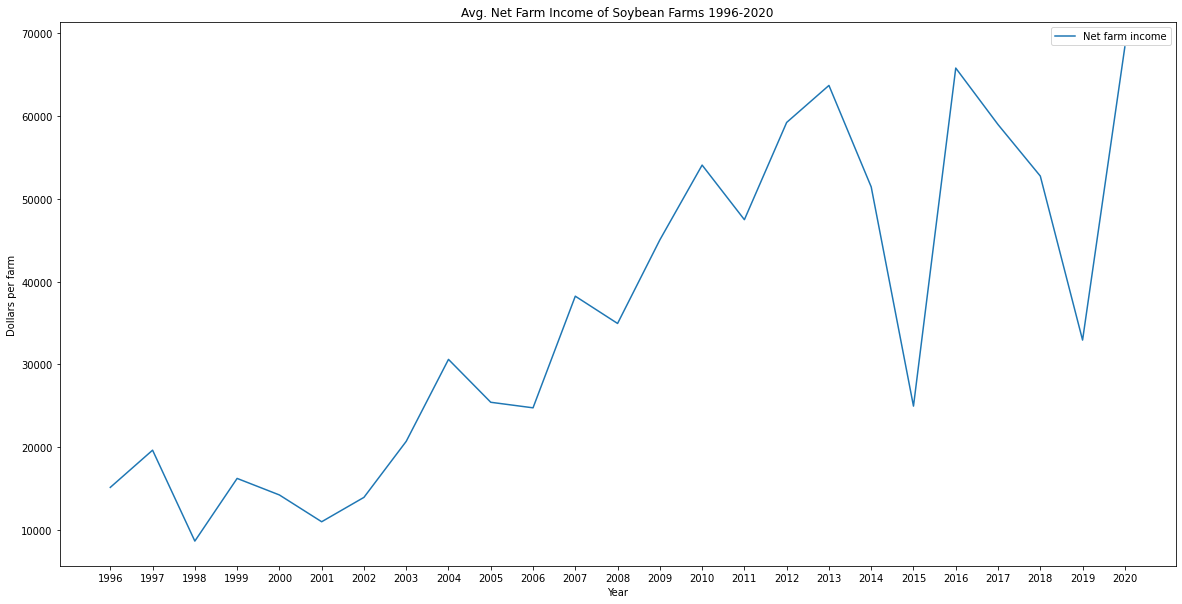

In [41]:
endpoint = arms_endpoints_dict.get("survey")
local_api_key = api_key

survey_query_params = {
    
    "year" : [ 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020 ],
    "report" : "Farm Business Income Statement",
    "variable" : "infi", # Net farm income
    "state" : [ "all" ],
    "category" : "spec",
    "category_value" : [ "Soybean" ]
}

survey_res = query_ers_data_api(endpoint, local_api_key, survey_query_params)

# Data returned should only be "infi" from the income statement reports of farms specializing in soybeans. Thus only data we need to grab to plot is the year and estimate
data_to_plot = {}
for result in survey_res.get("data"):
  data_to_plot[result.get("year")] = result.get("estimate")

# Data can be returned in random order, organize ascending by year. TODO: use numpy methods
sorted_to_plot = {}
for key in sorted(data_to_plot):
  sorted_to_plot[key] = data_to_plot[key]

#
# Create a simple line graph
#
plt.rcParams["figure.figsize"] = (20,10) # Set default figure size

x_axis = list(sorted_to_plot.keys()) # Set x axis to years returned
y_axis = list(sorted_to_plot.values()) # Y axis to variable values
plt.plot(x_axis, y_axis, label = survey_res.get("data")[0]["variable_name"]) # Plot and grab variable name for legend
plt.xlabel("Year") # Label x axis
plt.xticks(x_axis) # Show all x-axis values
plt.ylabel(survey_res.get("data")[0]["variable_unit"]) # Label y axis
plt.title("Avg. Net Farm Income of Soybean Farms 1996-2020") # Title the graph
plt.legend()
plt.show()

Again grabbing and plotting a single variable's value over a span of time. This time tagging/plotting by category value of a single category rather than filtering for a specific value. One line is plotted per category value

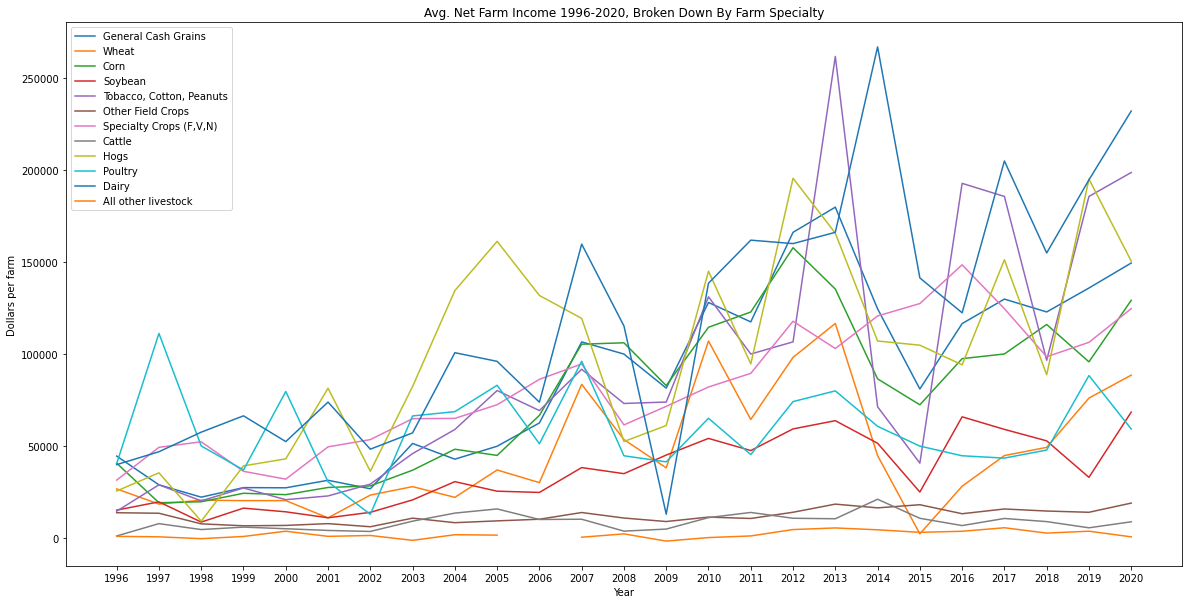

In [58]:
endpoint = arms_endpoints_dict.get("survey")
local_api_key = api_key

survey_query_params = {
    
    "year" : [ 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020 ],
    "report" : "Farm Business Income Statement",
    "variable" : "infi", # Net farm income
    "state" : [ "all" ],
    "category" : "spec",
    # "category_value" : [ "Soybean" ] # TAG INSTEAD OF FILTER
}

survey_res = query_ers_data_api(endpoint, local_api_key, survey_query_params)

# Data returned should only be "infi" from the income statement reports of farms of all specializations
# We will store data of interest in a dictionary with one key per category value. Each category value sub-dict of year and estimate combinations as above
# TODO: optimize lol
categorized_data_to_plot = {}
for result in survey_res.get("data"):
  if result.get("category_value") in categorized_data_to_plot:
    categorized_data_to_plot[result.get("category_value")][result.get("year")] = result.get("estimate") 
  else:
    categorized_data_to_plot[result.get("category_value")] = {}
    categorized_data_to_plot[result.get("category_value")][result.get("year")] = result.get("estimate") 

# Again, data can be returned in random order, organize ascending by year before feeding to mpl
organized_to_plot = {}
for category, dict_of_datavals in categorized_data_to_plot.items():
  organized_to_plot[category] = {} # Create a sub-dict for each category as we go along
  for dataval_year in sorted(categorized_data_to_plot[category]): # Organize the category and copy pairs into the sub-dict we made for it
    organized_to_plot[category][dataval_year] = categorized_data_to_plot[category][dataval_year]

plt.rcParams["figure.figsize"] = (20,10) # Set default figure size

# Plot each line, time as X axis and value/estimate as Y
for line in organized_to_plot.keys():
  # So far from my testing it seems that datasets will be congruent and should plot together fine
  # Will update if I run into issues
  plt.plot(list(organized_to_plot[line].keys()), list(organized_to_plot[line].values()), label = line) 

plt.xlabel("Year") # Label x axis
plt.xticks(list(organized_to_plot["Wheat"].keys())) # Show all x-axis values. Crude but just for POC, relying on the existence of Wheat category value to grab a list of years from
plt.ylabel(survey_res.get("data")[0]["variable_unit"]) # Label y axis
plt.title("Avg. Net Farm Income 1996-2020, Broken Down By Farm Specialty") # Title the graph
plt.legend()
plt.show()



# GIS/Geospatial API's
Main documentation page found [here](https://www.ers.usda.gov/developer/geospatial-apis/). 

In [ ]:
# TODO